In [1]:
#map(), lambda()

#map
# 计算列表各个元素的平方
def square(x):
    return x*x

list1 = list(range(1,6,1))
result = list(map(square,list1))
print(list1)
print(result)


#lambda函数

#x*y
add = lambda x, y: x * y
print('x * y =',add(12,6))   

# 按照x[1]进行列表排序
a = [(12,32),(34,56),(1,4),(23,18)]
a.sort(key = lambda x: x[1])
print(a)


#练习
#使用map(),lambda()实现
"""
新列表 = 原列表的平方
使用map, lambda两种方法完成
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9]
"""
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9]
l_square = lambda x: x*x
numbers1 = list(map(l_square,numbers))
print('newlist:',numbers1)


[1, 2, 3, 4, 5]
[1, 4, 9, 16, 25]
x * y = 72
[(1, 4), (23, 18), (12, 32), (34, 56)]
newlist: [1, 4, 9, 16, 25, 36, 49, 64, 81]


In [2]:
#错误示例
#使用lambda完成一个语法树 计算四则运算
#expr = a+5*b,
#当a = 3, b = 6, expr = 33

#First of all, we should define a global variable, env, which can be used in all functions.
#In this exercise, the global variable is a dictionary that contains element values we use to calculate.
env = {'a':3, 'b':6}
#Define the basic functions used on the elements. (How we should deal with the elements) 
Add = lambda env, a, b: a + b
Mul = lambda env, a, b: a * b
Num = lambda env, n: n
Var = lambda env, x: env[x]
#Define the function used on the expression.
_eval = lambda env, expr: expr[0](env, *expr[1:])
#Define the tree, the container that can convey the info about the executing steps into _eval.
tree = (Add, (Var,'a'), (Mul,(Num, 5),(Var,'b')))
#executing
result = _eval(env, tree)
result

(<function __main__.<lambda>(env, x)>,
 'a',
 <function __main__.<lambda>(env, a, b)>,
 (<function __main__.<lambda>(env, n)>, 5),
 (<function __main__.<lambda>(env, x)>, 'b'))

In [3]:
#为什么上面的错了
#根据上面的函数和变量，Mul将被传入a b：
a = (Num, 5)
b = (Var, 'b')
print('a = ', a)
print('b = ', b)
#但是实际上，Mul 应该被传入 am bm:
am = _eval(env, (Num,5))
bm = _eval(env, (Var,'b'))
print('am = ', am)
print('bm = ', bm)
#tree中的Mul实际上没有执行Num 和 Var 函数

#正确执行Mul：
#print(_eval(env,(Mul,am,bm)))


a =  (<function <lambda> at 0x000002176BBE27B8>, 5)
b =  (<function <lambda> at 0x000002176BBE2730>, 'b')
am =  5
bm =  6


In [4]:
#改正
#使用lambda完成一个语法树 计算四则运算
#expr = a+5*b,
#当a = 3, b = 6, expr = 33

#First of all, we should define a global variable, env, which can be used in all functions.
#In this exercise, the global variable is a dictionary that contains element values we use to calculate.
env = {'a':3, 'b':6}
#Define the basic functions used on the elements. (How we should deal with the elements) 
Add = lambda env, a, b: _eval(env, a) + _eval(env, b)
Mul = lambda env, a, b: _eval(env, a) * _eval(env, b)
Num = lambda env, n: n
Var = lambda env, x: env[x]
#Define the function used on the expression.
_eval = lambda env, expr: expr[0](env, *expr[1:])
#Define the tree, the container that can convey the info about the executing steps into _eval.
tree = (Add, (Var,'a'), (Mul,(Num, 5),(Var,'b')))
#executing
result = _eval(env, tree)
result

33

上证综指涨停：
 Empty DataFrame
Columns: [上证综指, 保利地产]
Index: []
保利地产涨停：
                 上证综指      保利地产
Date                          
2015-07-09  0.057635  0.100213
2015-12-02  0.023319  0.100379
2015-12-17  0.018148  0.100287
2016-03-02  0.042629  0.100211
2017-11-29  0.001261  0.100171


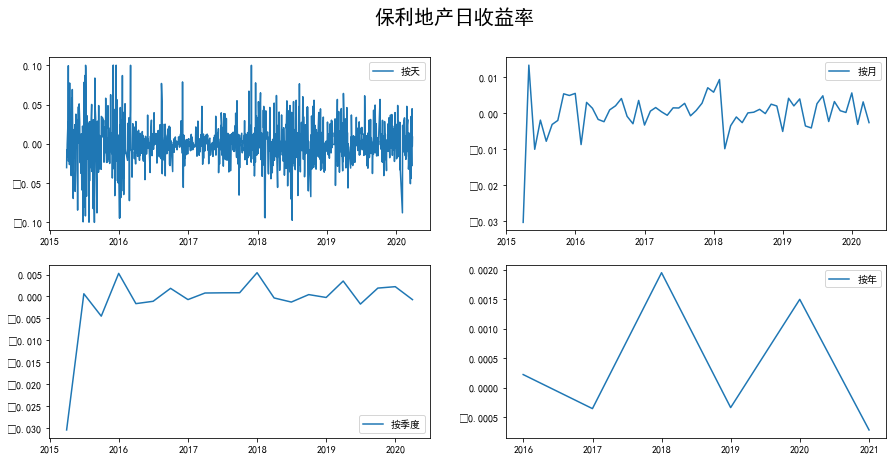

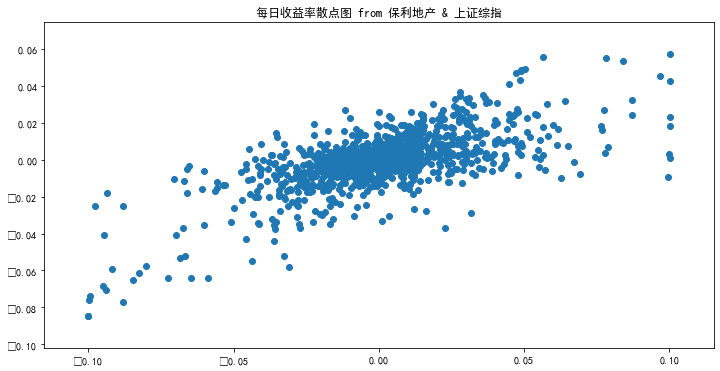

                            OLS Regression Results                            
Dep. Variable:                   保利地产   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     978.7
Date:                Sun, 29 Mar 2020   Prob (F-statistic):          4.74e-158
Time:                        00:57:45   Log-Likelihood:                 3059.3
No. Observations:                1216   AIC:                            -6115.
Df Residuals:                    1214   BIC:                            -6104.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
上证综指           1.1740      0.038     31.285      0.0

In [6]:
# Stock closed price visualization and regression
#保利地产，上证综指 

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import patsy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from scipy import stats
import seaborn as sns
import datetime, os, warnings



#使用DataReader读取股票数据
#因为datareader直接下载比较慢，可以先查看本地有无该股票数据，有则直接加载，不必重复通过datareader下载

#!pip install pandas-datareader
from pandas_datareader.data import DataReader

def load_data():
    #define start time and end time, time delta = 5 years
    end = datetime.datetime.now()
    year_5 = 365 * 5 + 2
    delta = datetime.timedelta(days = year_5)
    start = end - delta
    
    if os.path.exists('600048.csv'):
        data_ss = pd.read_csv('000001.csv')
        data_ply = pd.read_csv('600048.csv')
    else:
        #上证综指
        data_ss = DataReader('000001.SS', 'yahoo', start, end)
        #保利地产
        data_ply = DataReader('600048.SS', 'yahoo', start, end)
        #将数据存入本地，避免重复下载
        data_ss.to_csv('000001.csv')
        data_ply.to_csv('600048.csv')
    return data_ss, data_ply

data_ss, data_ply = load_data()
#print(data_ss.head())
#print(data_ply.head())

#提取close price
cp_ss = data_ss[['Date','Close']]
cp_ply = data_ply[['Date','Close']]

#数据合并
cp = cp_ss.merge(cp_ply, on = 'Date', how = 'outer')
cp.columns = ['Date', '上证综指', '保利地产']
cp.index = pd.to_datetime(cp['Date'])
cp = cp[['上证综指', '保利地产']]
#print(cp.head())
#print(cp.dtypes)

#计算每日收益率 daily_return
daily_return = cp[['上证综指', '保利地产']].diff()/cp[['上证综指', '保利地产']].shift()
daily_return = daily_return.dropna()
#print(daily_return.head())

#查看是否有当天收益率大于10%的，也就是涨停的
print('上证综指涨停：\n', daily_return[daily_return['上证综指']>0.1])
print('保利地产涨停：\n', daily_return[daily_return['保利地产']>0.1])


#收益率可视化
#按月、季度、年来统计收益率平均值
return_month = daily_return.resample('M').mean()
return_quarter = daily_return.resample('Q-DEC').mean()
return_year = daily_return.resample('A-DEC').mean()
#print(return_month.head())

#可视化
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
fig = plt.figure(figsize = [15,7])
plt.suptitle('保利地产日收益率', fontsize = 20)

plt.subplot(221)
plt.plot(daily_return['保利地产'], '-', label = '按天')
plt.legend()

plt.subplot(222)
plt.plot(return_month['保利地产'], '-', label = '按月')
plt.legend()

plt.subplot(223)
plt.plot(return_quarter['保利地产'], '-', label = '按季度')
plt.legend()

plt.subplot(224)
plt.plot(return_year['保利地产'], '-', label = '按年')
plt.legend()
plt.show()

#散点图
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(12,6))
plt.scatter(daily_return["保利地产"],daily_return["上证综指"])
plt.title("每日收益率散点图 from 保利地产 & 上证综指")
plt.show()

#回归分析 y = '保利地产', x = '上证综指'
#加入截距项
daily_return["intercept"]=1.0
model = sm.OLS(daily_return["保利地产"],daily_return[["上证综指","intercept"]])
results = model.fit()
print(results.summary())

#用sk learn 回归
import random
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#data partition
train_x, test_x, train_y, test_y = train_test_split(daily_return, daily_return['保利地产'], test_size = 0.3, random_state = 33)
#modeling
reg = linear_model.LinearRegression()
reg.fit(train_x, train_y)
print('coef:', reg.coef_)
pred_y = reg.predict(test_x)
print('mse:', mean_squared_error(test_y, pred_y))

In [7]:
#Action1
#句子生成器
host = """
host = 寒暄 报数 询问 具体业务 结尾
报数 = 我是工号 数字 号 ,
数字 = 单个数字 | 数字 单个数字
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好
询问 = 请问你要 | 您需要
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？"""

#生成语法字典
def getGrammarDict(gram, linesplit = '\n', gramsplit = '='):
    result = {}
    for line in gram.split(linesplit):
        if not line.strip():
            continue
        expr, statement = line.split(gramsplit)
        result[expr.strip()] = [i.split() for i in statement.split('|')]
    return result
    
gramdict = getGrammarDict(host)
print(gramdict)

#生成句子
import random
def generate(gramdict,target,isEng = False):
    if target not in gramdict:
        return target
    find = random.choice(gramdict[target])
    blank = ''
    if isEng:
        blank = ' '
    return blank.join(generate(gramdict, t, isEng) for t in find)

print(generate(gramdict,'host'))

{'host': [['寒暄', '报数', '询问', '具体业务', '结尾']], '报数': [['我是工号', '数字', '号', ',']], '数字': [['单个数字'], ['数字', '单个数字']], '单个数字': [['1'], ['2'], ['3'], ['4'], ['5'], ['6'], ['7'], ['8'], ['9']], '寒暄': [['称谓', '打招呼'], ['打招呼']], '称谓': [['人称', ',']], '人称': [['先生'], ['女士'], ['小朋友']], '打招呼': [['你好'], ['您好']], '询问': [['请问你要'], ['您需要']], '具体业务': [['喝酒'], ['打牌'], ['打猎'], ['赌博']], '结尾': [['吗？']]}
你好我是工号48号,请问你要喝酒吗？
